Dataset was obtained from here:

https://www.criminaljustice.ny.gov/crimnet/ojsa/comparison-population-arrests-prison-demographics.html
convert pdf to excel https://simplypdf.com/Excel

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# Import packages needed for ggplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotnine import *

In [3]:
xl2 = pd.ExcelFile('prison.xlsx')

sheetnames = xl2.sheet_names  # see all sheet names

sheets = sheetnames[4:66]

# run a loop to extract data from each sheet
data3 = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 2,nrows = 5)
    data3.append(countydata)
    
# Create new dataframe and add extracted data to it
prison_df = pd.DataFrame()
prison_df = prison_df.append(data3,True)

In [4]:
# Rename columns
prison_df.columns = ['race','population','%population','arrest','%arrest','felonyarrest','%felony','prison','%prison']
# Resulted dataframe
prison_df.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00


In [5]:
# Get a list of county names from each sheet
counties = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 0,nrows = 5)
    countyname = countydata.columns[0]
    counties.append(countyname)

In [6]:
# Stack them so that it's in the same format as the rest of the data

countynames = counties
County = []
for c in countynames:
    countyname = c
    county = [[]] * 5
    county[0].append(c)
    County.append(county)
County = pd.DataFrame(County)
County = County.unstack()
# Make sure it is the right length (310)
len(County)

310

In [7]:
# Reset index
County.reset_index(drop=True, inplace = True)

In [8]:
# Sort the county names so it matches the other table

County = County.sort_values()
County.reset_index(drop=True, inplace = True)

# Add the county labels to the dataset
prison_df['County'] = County

# Remove brackets and commas 
prison_df['County'] = prison_df['County'].str.join(', ')
prison_df = prison_df.replace(',','', regex=True)




In [9]:
# Rename to df2 so that we have an unultered original
prison_df2=prison_df

In [10]:
# Convert all the numeric columns to float
prison_df2['population'] = prison_df2['population'].astype(float)
prison_df2['arrest'] = prison_df2['arrest'].astype(float)
prison_df2['felonyarrest'] = prison_df2['felonyarrest'].astype(float)
prison_df2['prison'] = prison_df2['prison'].astype(float)

In [11]:
# Calculate total prison counts 

tprison = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['prison']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tprison.append(mult)
# Put it in a dataframe
tprison = pd.DataFrame(tprison)
# Put it all in one column
tprison = tprison.stack()
# Reset index
tprison.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totprison'] = tprison
# Remove brackets
prison_df2['totprison'] = prison_df2['totprison'].str[0]

In [12]:
# Calculate total population 

tpop = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tpop.append(mult)
# Put it in a dataframe
tpop = pd.DataFrame(tpop)
# Put it all in one column
tpop = tpop.stack()
# Reset index
tpop.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totpopulation'] = tpop
# Remove brackets
prison_df2['totpopulation'] = prison_df2['totpopulation'].str[0]

In [13]:
prison_df2

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totprison,totpopulation
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,364.0,307117.0
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,364.0,307117.0
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,364.0,307117.0
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,364.0,307117.0
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,364.0,307117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532.0,0.95,300.0,0.94,100.0,0.94,17.0,0.85,Yates County,20.0,24841.0
306,Black,220.0,0.01,9.0,0.03,2.0,0.02,1.0,0.05,Yates County,20.0,24841.0
307,Hispanic,574.0,0.02,8.0,0.03,3.0,0.03,2.0,0.10,Yates County,20.0,24841.0
308,Asian,201.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,Yates County,20.0,24841.0


In [14]:
# Calculate the felony (do the same)
tfelony = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['felonyarrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tfelony.append(mult)
# Put it in a dataframe
tfelony = pd.DataFrame(tfelony)
# Put it all in one column
tfelony = tfelony.stack()
# Reset index
tfelony.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totfelony'] = tfelony
# Remove brackets
prison_df2['totfelony'] = prison_df2['totfelony'].str[0]

In [15]:
# Calculate the arrest (do the same)
tarrest = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['arrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tarrest.append(mult)
# Put it in a dataframe
tarrest = pd.DataFrame(tarrest)
# Put it all in one column
tarrest = tarrest.stack()
# Reset index
tarrest.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totarrest'] = tarrest
# Remove brackets
prison_df2['totarrest'] = prison_df2['totarrest'].str[0]

In [53]:
# label counties that are in NY city as "NY city" and label others as "others"
data = []
for c in counties:
    if (c == 'Bronx County'or c=='Kings County'or c == 'NewYork County'or c == 'Queens County'or c == 'Richmond County'):
        mult = [[]] * 5
        mult[0].append('NY city')
        data.append(mult)     
    else:
        mult = [[]] * 5
        mult[0].append('Others')
        data.append(mult)  
        
data = pd.DataFrame(data)
data = data.unstack()

# Reset index
data.reset_index(drop=True, inplace = True)
# Sort the county names so it matches the other table

data = data.sort_values()
# Reset index again
data.reset_index(drop=True, inplace = True)

# Add the county labels to the dataset
prison_df2['city'] = data

# Remove brackets and commas 
prison_df2['city'] = prison_df['city'].str.join(', ')
prison_df2 = prison_df2.replace(',','', regex=True)
prison_df2['city'] = prison_df2['city'].str.replace(" ","")


In [19]:
# Quick look at county demographics
countydem = prison_df2[['County','race','city','%population']]
countydem = countydem.pivot(index = ['County','city'],columns='race', values='%population')
countydem = countydem.reset_index()

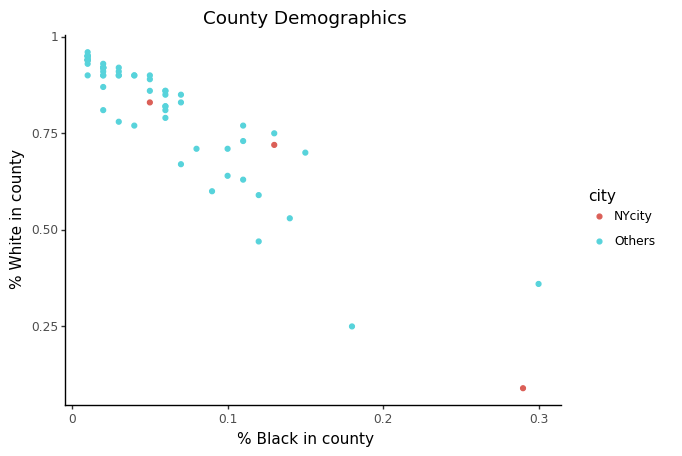

<ggplot: (7015712329)>

In [20]:
(ggplot(countydem, aes(x= 'Black', y='White', color='city')) 
 + geom_point()
 + ggtitle('County Demographics')
 + theme_classic()
 + ylab('% White in county')
 + xlab('% Black in county')
)

In [21]:
# Add a column for % White of population for each county
perwhite = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "White")]
    toadd = rows['%population']
    tot = sum(toadd) # Using this sum funciton to strip unnecessary stuff
    mult = [[]] * 5
    mult[0].append(tot)
    perwhite.append(mult)
perwhite = pd.DataFrame(perwhite)

perwhite = perwhite.stack()
perwhite.reset_index(drop=True,inplace=True)
perwhite = perwhite.str[0]

# Add to prison_df2
prison_df2['perwhite'] = perwhite

In [22]:
# Plot the arrest percentage for white majority and white minory couunties 
# Add a column white demographic for each county

whitedems = []
whiteper = prison_df2['perwhite']

for w in whiteper:
    if w > 0.5:
        racedem = 'white >0.5'
    else:
        racedem = 'white <=0.5'
    whitedems.append(racedem)    


prison_df2['whitedems'] = whitedems

whitesum = prison_df2.groupby(['whitedems','race']).sum()
whitesum = whitesum.reset_index()

In [23]:
prison_df2['arrest/population'] = prison_df2['arrest']/prison_df2['population']

In [54]:
black = prison_df2[(prison_df2.race == 'Black')]

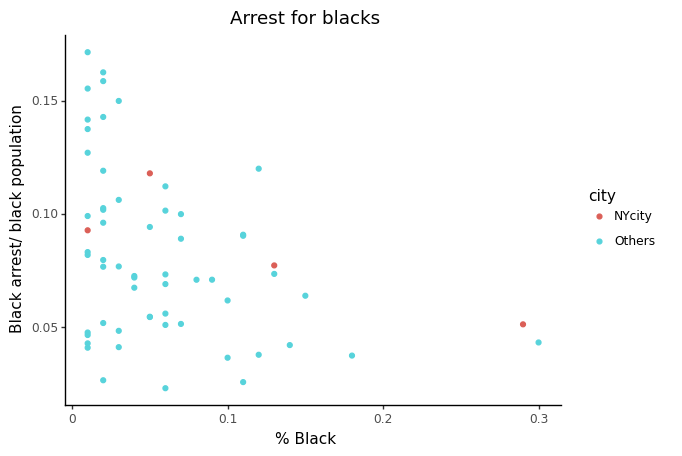

<ggplot: (7016207085)>

In [25]:
(ggplot(black, aes(x= '%population', y='arrest/population',color = 'city')) 
 + geom_point()
 + ggtitle('Arrest for blacks')
 + ylab('Black arrest/ black population')
 + xlab('% Black')
 + theme_classic()
)

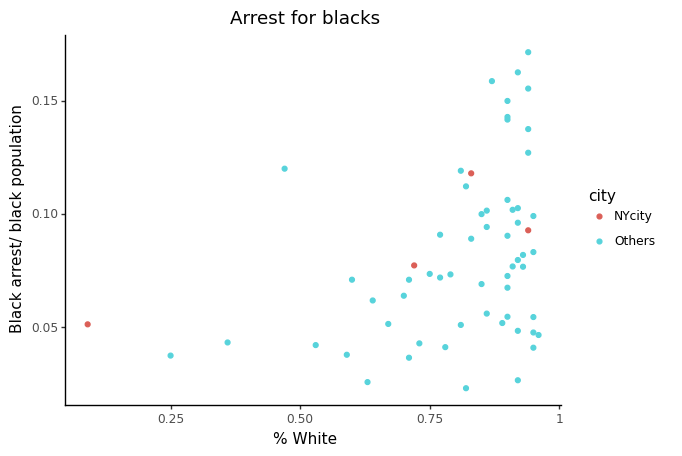

<ggplot: (7016472649)>

In [27]:
(ggplot(black, aes(x= 'perwhite', y='arrest/population',color = 'city')) 
 + geom_point()
 + ggtitle('Arrest for blacks')
 + ylab('Black arrest/ black population')
 + xlab('% White')
 + theme_classic()
)

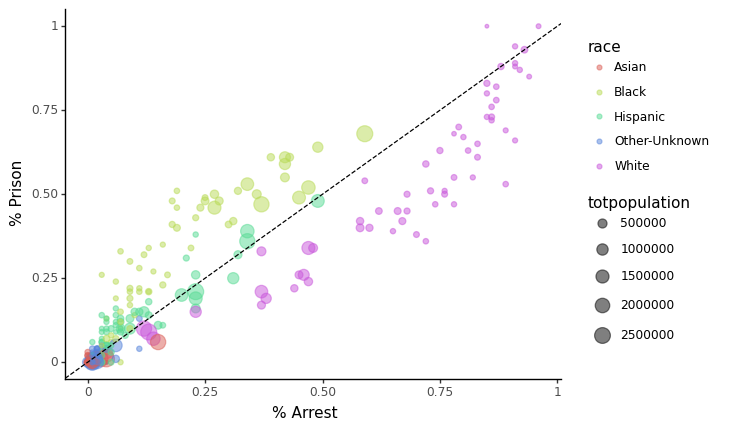

<ggplot: (7015970709)>

In [28]:
(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='totpopulation')) 
 + geom_point(alpha=0.5) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
 + xlab("% Arrest")
 + ylab("% Prison")
 + theme_classic()
)

In [29]:
# Take the log of the population
prison_df2['logpop'] = np.log10(prison_df2['population'])

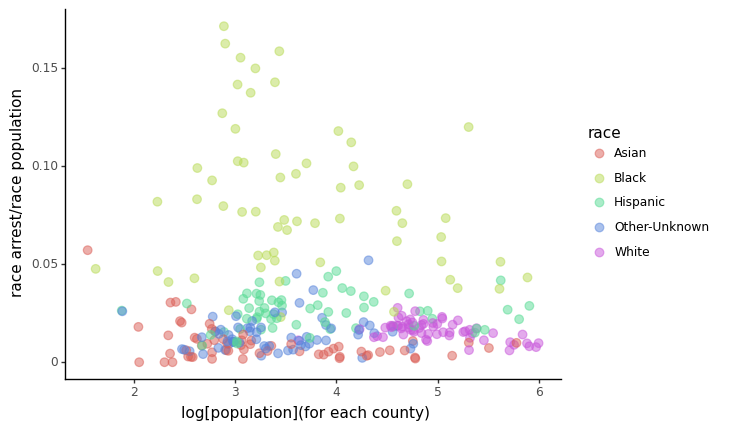

<ggplot: (7015935305)>

In [30]:
(ggplot(prison_df2, aes(x="logpop", y="arrest/population", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('log[population](for each county)')
 + ylab('race arrest/race population')
 + theme_classic()
)

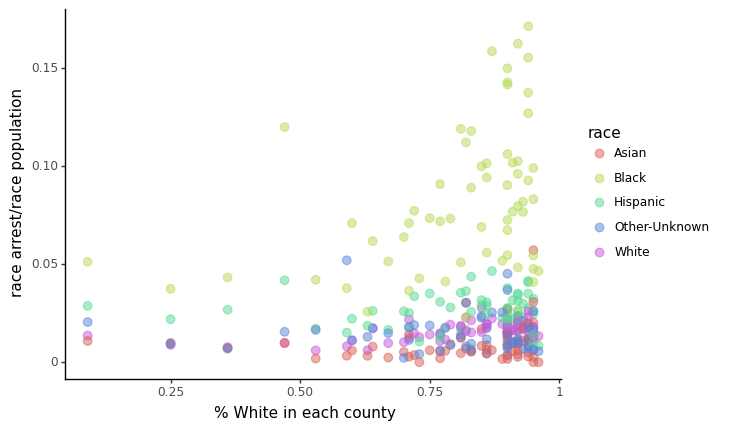

<ggplot: (7015706037)>

In [31]:
# Plot the arrest per population for each race
(ggplot(prison_df2, aes(x="perwhite", y="arrest/population", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('race arrest/race population')
 + theme_classic()
)

In [55]:
# Create a dataframe from groupby summary table

whiteminorows = whitesum[(whitesum.whitedems == 'white <=0.5')]
totarrestwhiteminority = sum(whiteminorows['arrest'])
whitemajrows = whitesum[(whitesum.whitedems == 'white >0.5')]
totarrestwhitemajority = sum(whitemajrows['arrest'])
whitemin = whiteminorows['arrest']/totarrestwhiteminority
whitemaj = whitemajrows['arrest']/totarrestwhitemajority
arrestwhite = pd.DataFrame(whitemin)
whitemaj.reset_index(drop=True, inplace = True)
arrestwhite['whitemaj'] = whitemaj
race = ['Asian','Black','Hispanic','Unknown','White']
arrestwhite['race'] = race
arrestwhite.columns = ['white <=0.5','white >0.5','race']
arrestwhite = pd.melt(arrestwhite, id_vars = ['race'], value_vars = ['white <=0.5','white >0.5'])
arrestwhite.columns = ['race','whitedem','arrestpercent']
arrestwhite['arrestpercent'] = arrestwhite['arrestpercent']*100
# Round up decimal 
arrestwhite['arrestpercent'] = round(arrestwhite['arrestpercent'],1)


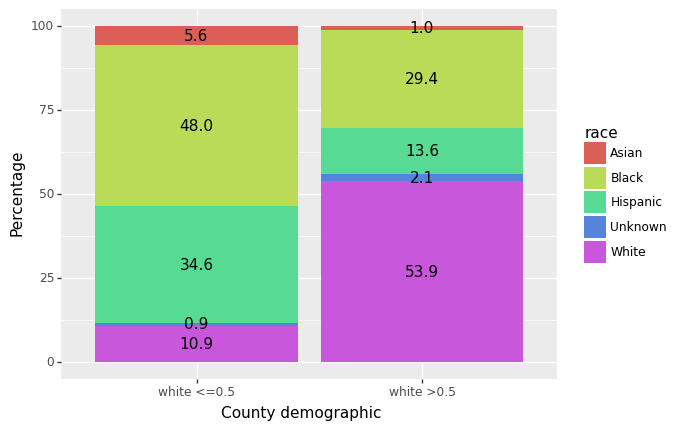

<ggplot: (7016114545)>

In [33]:
(ggplot(arrestwhite, aes(x='whitedem', y='arrestpercent', fill='race'))
 + geom_col() 
 + xlab('County demographic')
 + ylab('Percentage')
 + geom_text(aes(x='whitedem', y='arrestpercent', label='arrestpercent'),position = position_stack(vjust = 0.5))
)

In [34]:
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum['arrest/population'].tolist()
meanratio = mean[['race','arrest/population']]
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['arrest/population'] - meanratio['sem']
meanratio['ymax'] = meanratio['arrest/population'] + meanratio['sem']



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

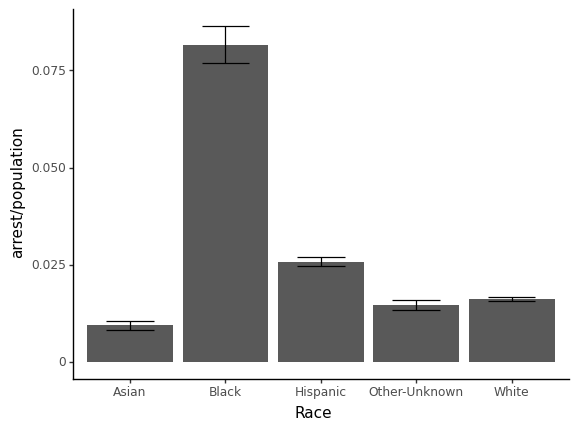

<ggplot: (7016020373)>

In [35]:
(ggplot(meanratio, aes(x='race',y='arrest/population')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('arrest/population')
)

Black people are arrested dispropotionately compared to other race

In [56]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()
# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,'arrest/population']
whitearrpop = whitemean[['whitedems','race','arrest/population']]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['arrest/population'] - sem
whitearrpop['ymax'] = whitearrpop['arrest/population'] + sem

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

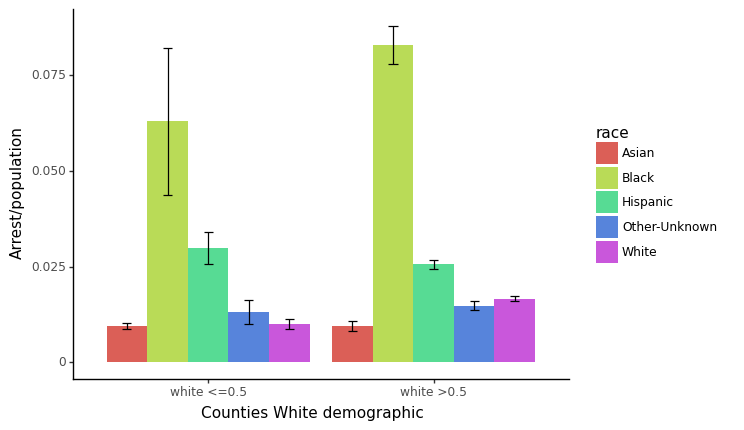

<ggplot: (7016101921)>

In [37]:
(ggplot(whitearrpop, aes(x='whitedems', y='arrest/population', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Arrest/population")
 + xlab("Counties White demographic")
)

It's worse for black people when the white population is a high percentage

In [38]:
# Add a column for % Black of population for each county

perblack = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "Black")]
    toadd = rows['%population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    perblack.append(mult)
perblack = pd.DataFrame(perblack)

perblack = perblack.stack()
perblack.reset_index(drop=True,inplace=True)
perblack = perblack.str[0]
prison_df2['perblack'] = perblack

/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


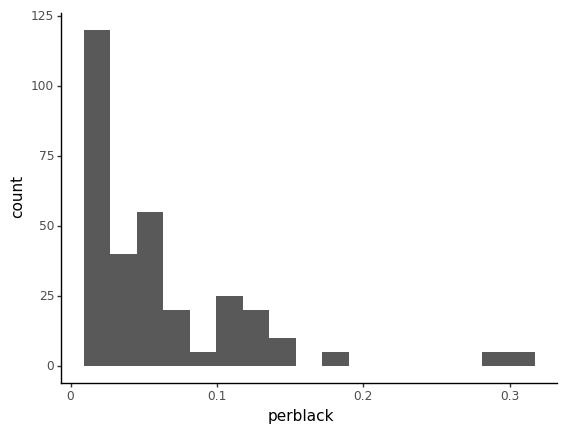

<ggplot: (7015987429)>

In [39]:
# Quick look at the distribution of counties/black demographic
(ggplot(prison_df2,aes(x='perblack')) 
 + geom_histogram()
 + theme_classic()
)

In [40]:
# Create a column for black demographic for each county
blackdems = []
blackper = prison_df2['perblack']

for w in blackper:
    if w > 0.1:
        racedem = 'black >0.1'
    else:
        racedem = 'black <=0.1'
    blackdems.append(racedem)    


prison_df2['blackdems'] = blackdems

In [57]:
# Get the summary for mean
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()
blackarrpop = blackmean[['blackdems','race','arrest/population']]
# Create data table for the bar graph

blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,'arrest/population']
blackarrpop = blackmean[['blackdems','race','arrest/population']]
blackarrpop['sem'] = sem
blackarrpop['ymin'] = blackarrpop.loc[:,'arrest/population'] - sem
blackarrpop['ymax'] = blackarrpop.loc[:,'arrest/population'] + sem

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

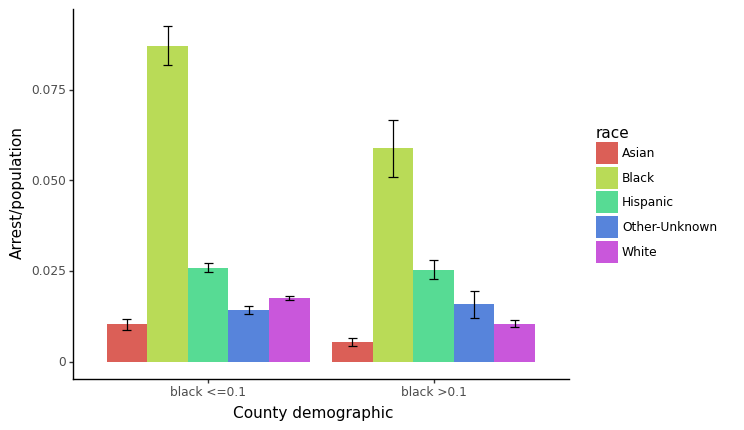

<ggplot: (7015934137)>

In [42]:
(ggplot(blackarrpop, aes(x='blackdems', y='arrest/population', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 + ylab('Arrest/population')
 + xlab('County demographic')
 # dodge puts it at the right place
 + theme_classic()
)

Higher percentage of black people, less asian, white, and black people get arrested

In [43]:
# re-calculate % population because the original data is missing decimal points
recalcpop = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['population']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['population']
        totr = sum(rpop)
        percent = totr/tot
        recalcpop.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%pop'] = recalcpop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [44]:
# re-calculate % arrest to be exact
recalcarrest = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['arrest']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['arrest']
        totr = sum(rpop)
        percent = totr/tot
        recalcarrest.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%arrest'] = recalcarrest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [45]:
# Calculate an unfair factor and name it 'ratio'
prison_df2['ratio'] = (prison_df2['recalc%arrest']+0.001)/(prison_df2['recalc%pop']+0.001) 

In [46]:
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum['ratio'].tolist()
meanratio = mean[['race','ratio']]  
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['ratio'] - meanratio['sem']
meanratio['ymax'] = meanratio['ratio'] + meanratio['sem']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

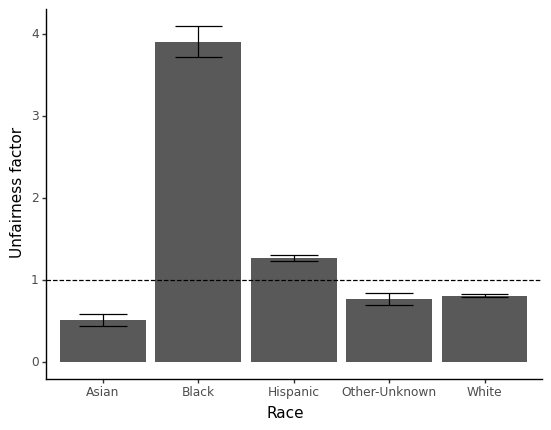

<ggplot: (7015600793)>

In [47]:
(ggplot(meanratio, aes(x='race',y='ratio')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('Unfairness factor')
 + geom_hline(yintercept=1,linetype='dashed')
)

Black people are arrested unfairly overall

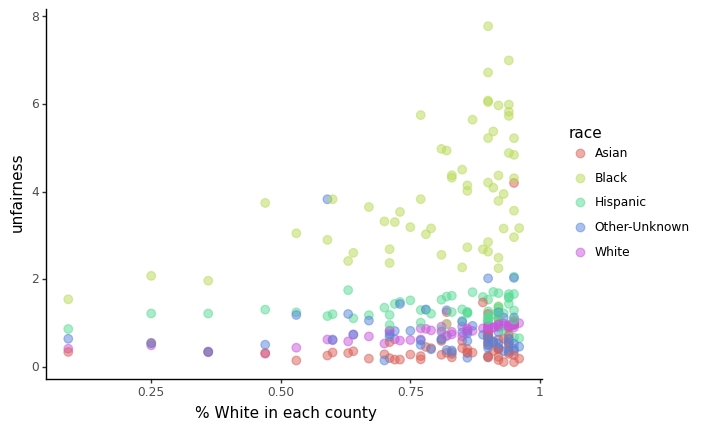

<ggplot: (7015947177)>

In [48]:
# Plot the arrest per population for each race
(ggplot(prison_df2, aes(x="perwhite", y="ratio", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('unfairness')
 + theme_classic()
)

The higher the percentage of white people in the county, the more unfair arrests for black people

In [58]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()

# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,'ratio']
whitearrpop = whitemean[['whitedems','race','ratio']]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['ratio'] - sem
whitearrpop['ymax'] = whitearrpop['ratio'] + sem

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

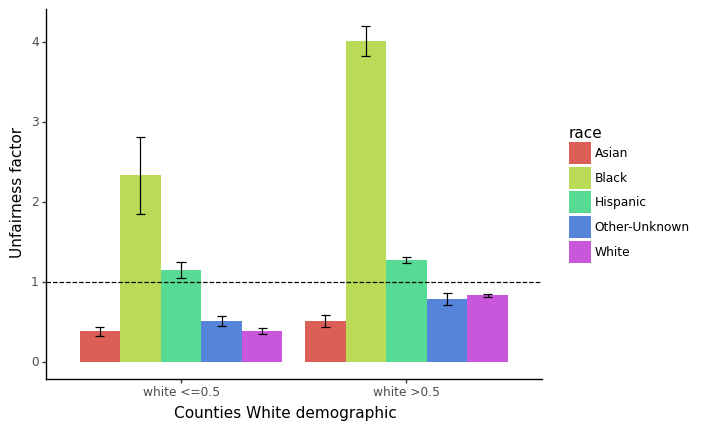

<ggplot: (7015535761)>

In [50]:
(ggplot(whitearrpop, aes(x='whitedems', y='ratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Unfairness factor")
 + xlab("Counties White demographic")
 + geom_hline(yintercept=1,linetype='dashed')
)

In [59]:
# Get the mean with groupby
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()

# Calculate standard error (sem)
blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,'ratio']
blackarrpop = blackmean[['blackdems','race','ratio']]
blackarrpop['sem'] = sem
# get ymin and ymax for errorbars
blackarrpop['ymin'] = blackarrpop['ratio'] - sem
blackarrpop['ymax'] = blackarrpop['ratio'] + sem

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

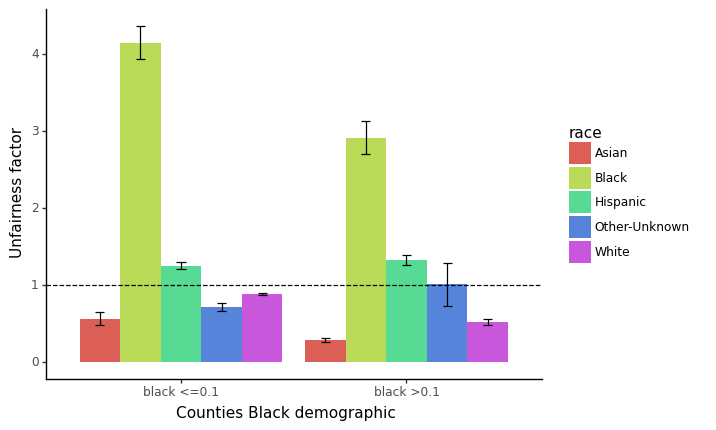

<ggplot: (7015721597)>

In [52]:
(ggplot(blackarrpop, aes(x='blackdems', y='ratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Unfairness factor")
 + xlab("Counties Black demographic")
 + geom_hline(yintercept=1,linetype='dashed')
)